In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches

goalscorers = pd.read_csv('data/goalscorers.csv')
data = pd.read_csv('data/results.csv')
shooutouts = pd.read_csv('data/shootouts.csv')

In [3]:
data.head()  # View the first few rows
data.info()  # Check data types and missing values
data.describe()  # Summarize numerical data (scores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47126 entries, 0 to 47125
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47126 non-null  object 
 1   home_team   47111 non-null  object 
 2   away_team   47111 non-null  object 
 3   home_score  47075 non-null  float64
 4   away_score  47075 non-null  float64
 5   tournament  47126 non-null  object 
 6   city        47126 non-null  object 
 7   country     47126 non-null  object 
 8   neutral     47126 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


,home_score,away_score
count,47075.000000,47075.000000
mean,1.761190,1.183452
std,1.776751,1.402597
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [58]:
num_matches = data.shape[0]
print(f"Total number of matches: {num_matches}")

data['winner'] = data.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else (row['away_team'] if row['away_score'] > row['home_score'] else None), axis=1)


Total number of matches: 47126


In [59]:
unique_home_teams = data['home_team'].nunique()
unique_away_teams = data['away_team'].nunique()
total_unique_teams = len(set(data['home_team'].unique()).union(set(data['away_team'].unique())))
print(f"Unique home teams: {unique_home_teams}")
print(f"Unique away teams: {unique_away_teams}")
print(f"Total unique teams (considering both home & away): {total_unique_teams}")

Unique home teams: 328
Unique away teams: 323
Total unique teams (considering both home & away): 339


In [60]:
total_goals_scored = data['home_score'].sum() + data['away_score'].sum()
avg_goals_per_match = total_goals_scored / num_matches
print(f"Total goals scored: {total_goals_scored}")
print(f"Average goals per match: {avg_goals_per_match:.2f}")

Total goals scored: 138619.0
Average goals per match: 2.94


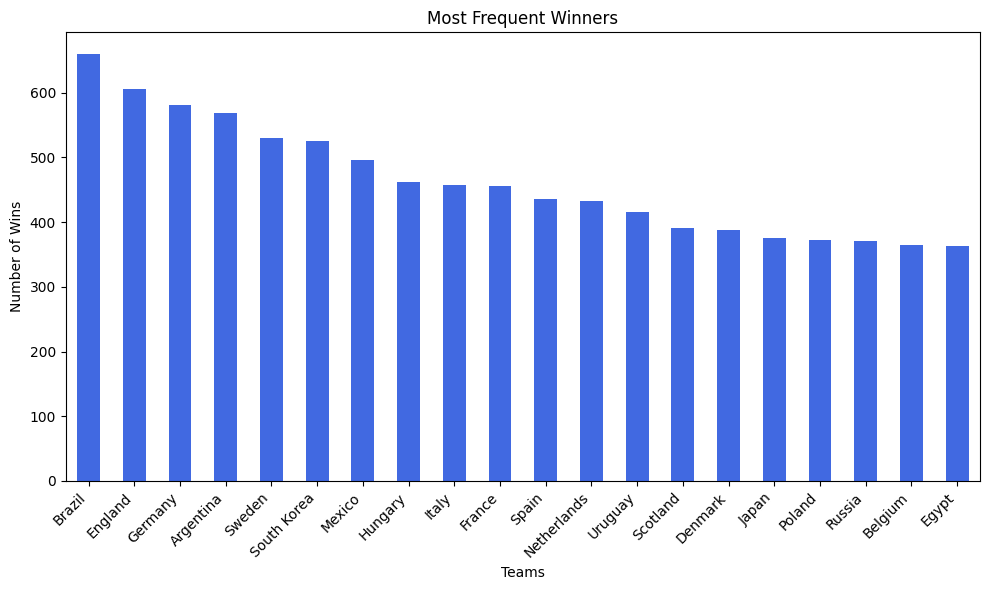

In [61]:
# Most frequent winners visualization (using Matplotlib)
winner_counts = data['winner'].value_counts().head(20)
plt.figure(figsize=(10, 6))
winner_counts.plot(kind='bar', color='royalblue')
plt.title('Most Frequent Winners')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

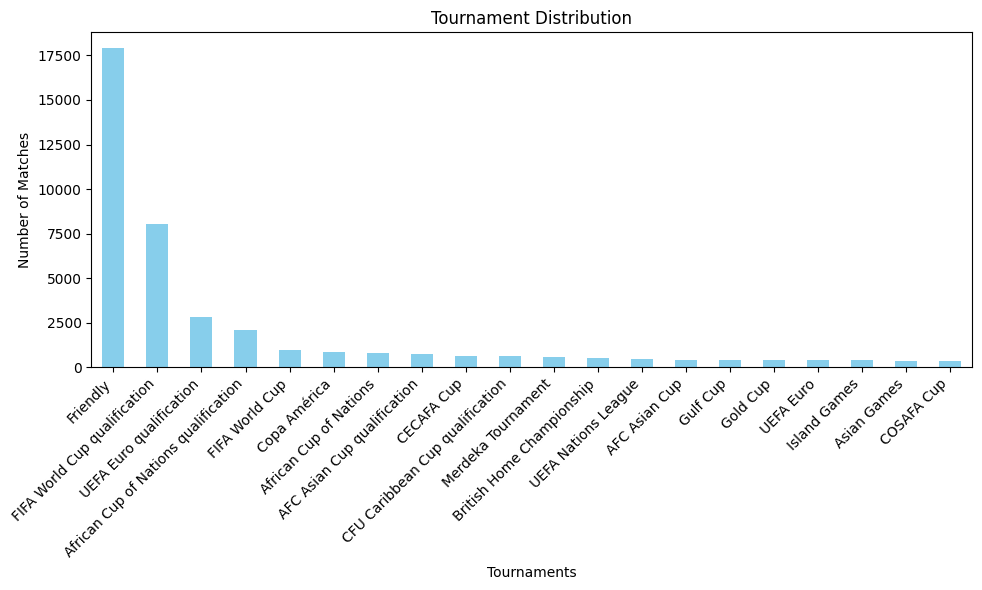

In [62]:
# Tournament distribution visualization (using Matplotlib)
tournament_counts = data['tournament'].value_counts().head(20)
plt.figure(figsize=(10, 6))
tournament_counts.plot(kind='bar', color='skyblue')
plt.title('Tournament Distribution')
plt.xlabel('Tournaments')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

AttributeError: Wedge.set() got an unexpected keyword argument 'angle'

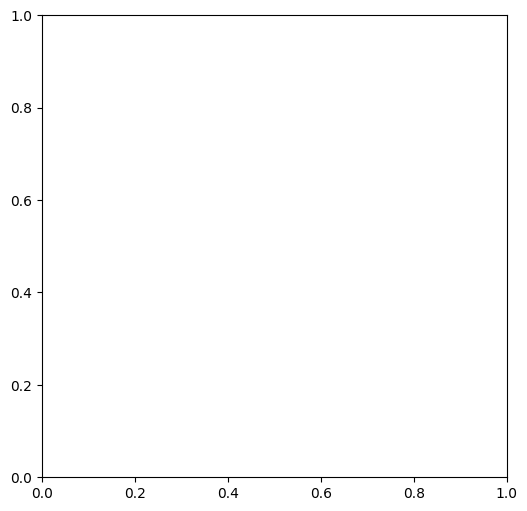

In [63]:
neutral_matches = data[data['neutral'] == True]
pct_neutral_matches = (len(neutral_matches) / num_matches) * 100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Create wedge for neutral matches
neutral_wedge = patches.Wedge((0.5, 0.5), 0.4, angle=0, theta1=0, theta2=pct_neutral_matches, color='gold', label='Neutral Venue')
ax.add_artist(neutral_wedge)

# Create wedge for home/away matches (remaining portion of the pie)
home_away_wedge = patches.Wedge((0.5, 0.5), 0.4, angle=0, theta1=pct_neutral_matches, theta2=360, color='lightgreen', label='Home/Away Venue')
ax.add_artist(home_away_wedge)

# Add title and legend
plt.title(f"Neutral Venues: {pct_neutral_matches:.2f}% of Matches")
plt.legend()

# Adjust layout to prevent overlapping labels
plt.tight_layout()

plt.show()

In [65]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,None
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,None
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland


In [64]:
# Filter World Cup data
world_cup_data = data
world_cup_data.head()

rows = []

# Iterate over each row in the DataFrame
for idx, row in world_cup_data.iterrows():
    # Home team entry
    rows.append({
        'date': row['date'],
        'team': row['home_team'],
        'opposing_team': row['away_team'],
        'score': row['home_score'],
        'opponent_score': row['away_score'],
        'home_or_away': 'home',
        'result': 'win' if row['home_score'] > row['away_score'] else 'lose' if row['home_score'] < row['away_score'] else 'draw',
        'host': row['country'] == row['home_team'],
        'tournament': row['tournament'],
        'city': row['city'],
        'country': row['country'],
        'neutral': row['neutral'],
    })
    # Away team entry
    rows.append({
        'date': row['date'],
        'team': row['away_team'],
        'opposing_team': row['home_team'],
        'score': row['away_score'],
        'opponent_score': row['home_score'],
        'home_or_away': 'away',
        'result': 'win' if row['away_score'] > row['home_score'] else 'lose' if row['away_score'] < row['home_score'] else 'draw',
        'host': row['country'] == row['away_team'],
        'tournament': row['tournament'],
        'city': row['city'],
        'country': row['country'],
        'neutral': row['neutral'],
    })

# Create a new DataFrame from the transformed rows
transformed_df = pd.DataFrame(rows)
transformed_df['date'] = pd.to_datetime(transformed_df['date'])

# Display the new DataFrame
transformed_df.head()

transformed_df.to_csv('data/results_transformed.csv')

In [32]:
results = {}

# Get unique teams
teams = transformed_df['team'].unique()

# Iterate over each team
for team in teams:
    # Filter data for the current team
    team_data = transformed_df[transformed_df['team'] == team]
    
    # Host games
    host_games = team_data[team_data['host'] == True]
    host_wins = host_games[host_games['result'] == 'win'].shape[0]
    host_win_rate = host_wins / host_games.shape[0] if host_games.shape[0] != 0 else 0
    host_years = len(host_games['date'].dt.year.unique())
    host_avg_wins = host_wins / host_years if host_years != 0 else 0
    
    # Non-host games
    non_host_games = team_data[team_data['host'] == False]
    non_host_wins = non_host_games[non_host_games['result'] == 'win'].shape[0]
    non_host_win_rate = non_host_wins / non_host_games.shape[0] if non_host_games.shape[0] != 0 else 0
    non_host_years = len(non_host_games['date'].dt.year.unique())
    non_host_avg_wins = non_host_wins / non_host_years if non_host_years != 0 else 0
    
    # Store results in dictionary
    results[team] = {
        'host_win_rate': host_win_rate,
        'non_host_win_rate': non_host_win_rate,
        'host_avg_wins': host_avg_wins,
        'non_host_avg_wins': non_host_avg_wins,
        'host_years': host_years,
        'non_host_years': non_host_years,
        'win_diff': host_avg_wins - non_host_avg_wins
    }

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')

results_df

,host_win_rate,non_host_win_rate,host_avg_wins,non_host_avg_wins,host_years,non_host_years,win_diff
Belgium,0.000000,0.411765,0.0,1.500000,0,14,-1.500000
United States,0.250000,0.242424,1.0,0.800000,1,10,0.200000
France,0.777778,0.500000,3.5,2.285714,2,14,1.214286
Mexico,0.555556,0.235294,2.5,0.800000,2,15,1.700000
Brazil,0.538462,0.683168,3.5,3.450000,2,20,0.050000
...,...,...,...,...,...,...,...
Slovakia,0.000000,0.250000,0.0,1.000000,0,1,-1.000000
Bosnia and Herzegovina,0.000000,0.333333,0.0,1.000000,0,1,-1.000000
Iceland,0.000000,0.000000,0.0,0.000000,0,1,0.000000
Panama,0.000000,0.000000,0.0,0.000000,0,1,0.000000


In [55]:
# Filter for teams that have been hosts at least once
from matplotlib.table import Table
import emoji
import plotly.graph_objects as go

hosts_df = results_df[results_df['host_years'] > 0]

def get_flag_url(country):
    country_codes = {
        'United States': 'US',
        'France': 'FR',
        'Mexico': 'MX',
        'Brazil': 'BR',
        'Argentina': 'AR',
        'Chile': 'CL',
        'Uruguay': 'UY',
        'Sweden': 'SE',
        'Germany': 'DE',
        'Spain': 'ES',
        'Italy': 'IT',
        'Switzerland': 'CH',
        'England': 'GB',
        'South Korea': 'KR',
        'Russia': 'RU',
        'South Africa': 'ZA',
        'Japan': 'JP',
        'Qatar': 'QA'
    }
    code = country_codes[country]
    return f"https://flagcdn.com/w320/{code.lower()}.png"

# Add the flag URLs to the DataFrame
hosts_df['Flag URL'] = hosts_df.index.map(get_flag_url)

# Display the DataFrame
hosts_df

C:\Users\nickl\AppData\Local\Temp\ipykernel_26388\2353454163.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,host_win_rate,non_host_win_rate,host_avg_wins,non_host_avg_wins,host_years,non_host_years,win_diff,Flag URL
United States,0.250000,0.242424,1.0,0.800000,1,10,0.200000,https://flagcdn.com/w320/us.png
France,0.777778,0.500000,3.5,2.285714,2,14,1.214286,https://flagcdn.com/w320/fr.png
Mexico,0.555556,0.235294,2.5,0.800000,2,15,1.700000,https://flagcdn.com/w320/mx.png
Brazil,0.538462,0.683168,3.5,3.450000,2,20,0.050000,https://flagcdn.com/w320/br.png
Argentina,0.714286,0.518519,5.0,2.470588,1,17,2.529412,https://flagcdn.com/w320/ar.png
Chile,0.666667,0.259259,4.0,0.875000,1,8,3.125000,https://flagcdn.com/w320/cl.png
Uruguay,1.000000,0.381818,4.0,1.615385,1,13,2.384615,https://flagcdn.com/w320/uy.png
Sweden,0.666667,0.333333,4.0,1.363636,1,11,2.636364,https://flagcdn.com/w320/se.png
Germany,0.785714,0.581633,5.5,3.166667,2,18,2.333333,https://flagcdn.com/w320/de.png
Spain,0.200000,0.483871,1.0,2.000000,1,15,-1.000000,https://flagcdn.com/w320/es.png
